In [39]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 9)

In [4]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1


X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

pca = PCA(n_components = 100, whiten = True, random_state = 0)
X_pca = pca.fit_transform(X_people)

In [4]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: ", np.unique(labels))

고유한 레이블:  [-1]


In [5]:
# DBSCAN, min_samples = 3
dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: ", np.unique(labels))

고유한 레이블:  [-1]


In [6]:
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: ", np.unique(labels))

고유한 레이블:  [-1  0]


In [7]:
print("클러스터별 포인트 수", np.bincount(labels + 1))

클러스터별 포인트 수 [  32 2031]


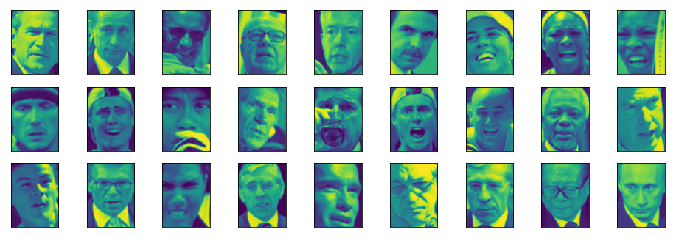

In [8]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw = {"xticks": (), "yticks": ()}, figsize = (12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)

In [9]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps: ", eps)
    dbscan = DBSCAN(min_samples = 3, eps = eps)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수: ", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps:  1
클러스터 수:  1
클러스터 크기: [2063]

eps:  3
클러스터 수:  1
클러스터 크기: [2063]

eps:  5
클러스터 수:  1
클러스터 크기: [2063]

eps:  7
클러스터 수:  14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps:  9
클러스터 수:  4
클러스터 크기: [1307  750    3    3]

eps:  11
클러스터 수:  2
클러스터 크기: [ 413 1650]

eps:  13
클러스터 수:  2
클러스터 크기: [ 120 1943]


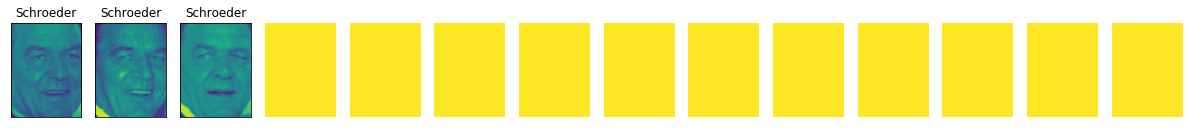

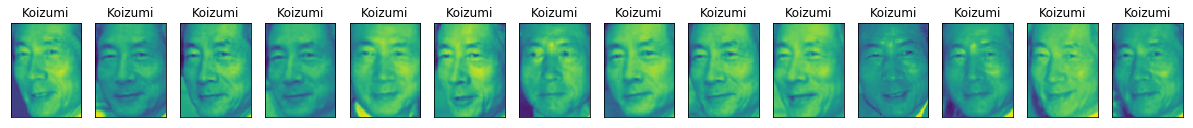

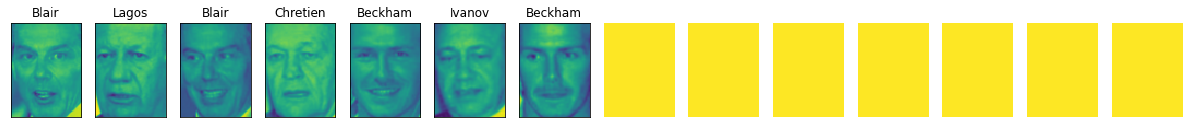

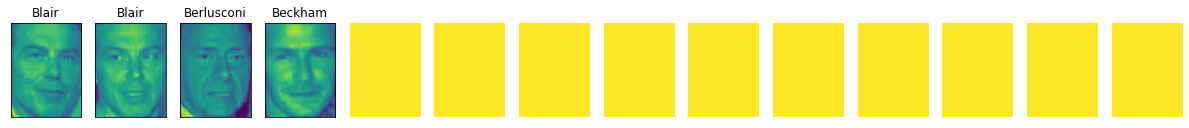

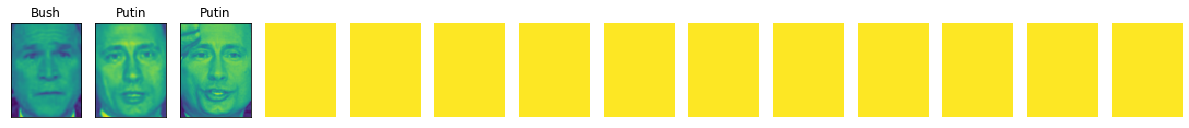

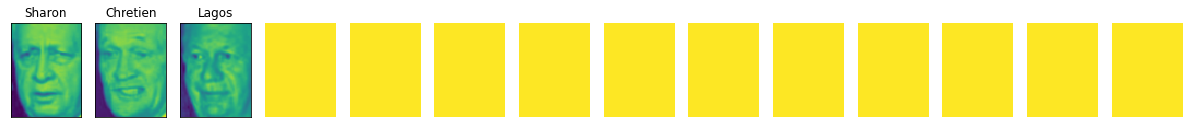

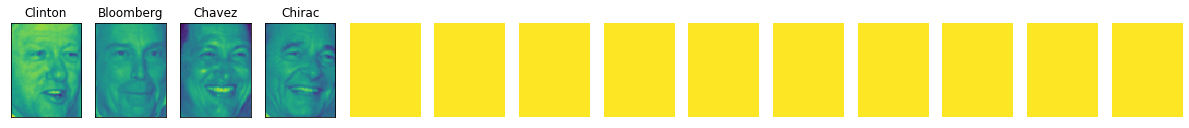

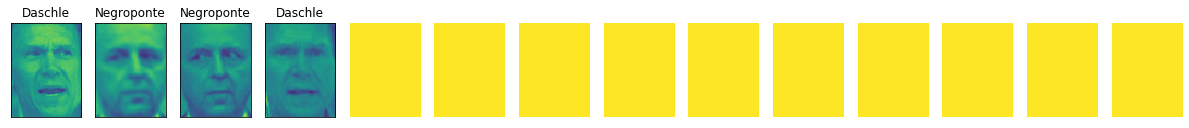

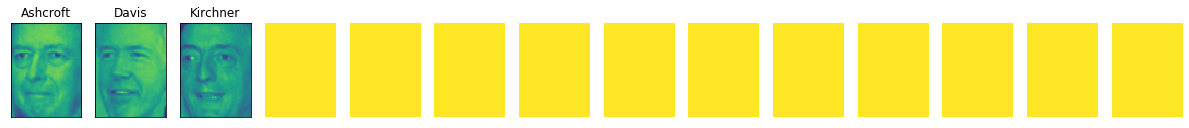

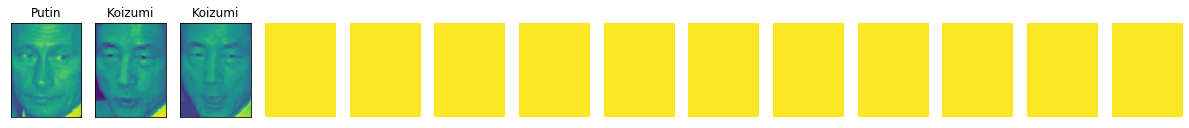

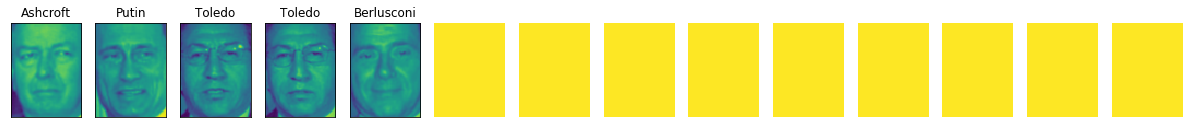

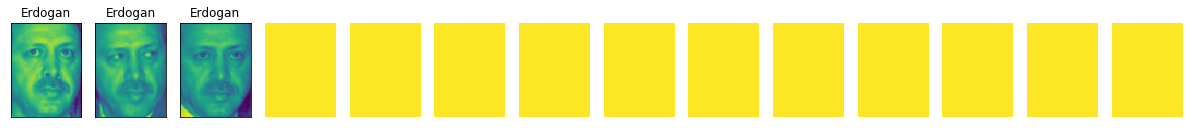

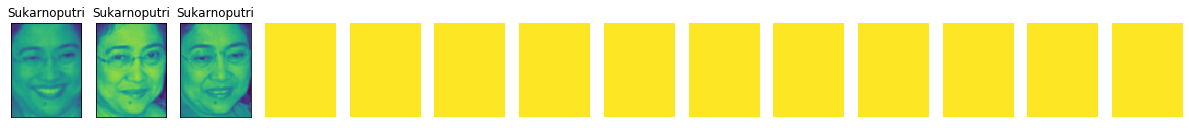

In [29]:
dbscan = DBSCAN(min_samples = 3, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_image = np.sum(labels)
    fig, axes = plt.subplots(1, 14, figsize= (14*1.5, 4), subplot_kw = {"xticks": (), "yticks": ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1 )
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin = 0, vmax = 1)
        axes[j+i].axis("off")

In [8]:
# kmeans face data set

km = KMeans(n_clusters = 10, random_state = 0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


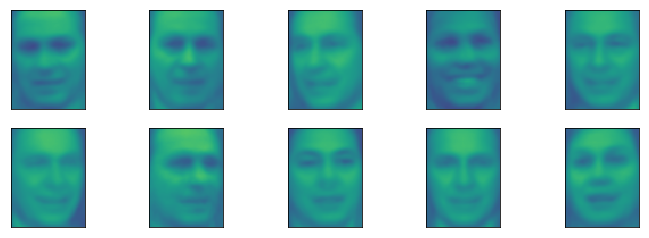

In [34]:
fig, axes = plt.subplots(2, 5, subplot_kw = {"xticks": (), "yticks": ()}, figsize = (12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin = 0, vmax = 1)

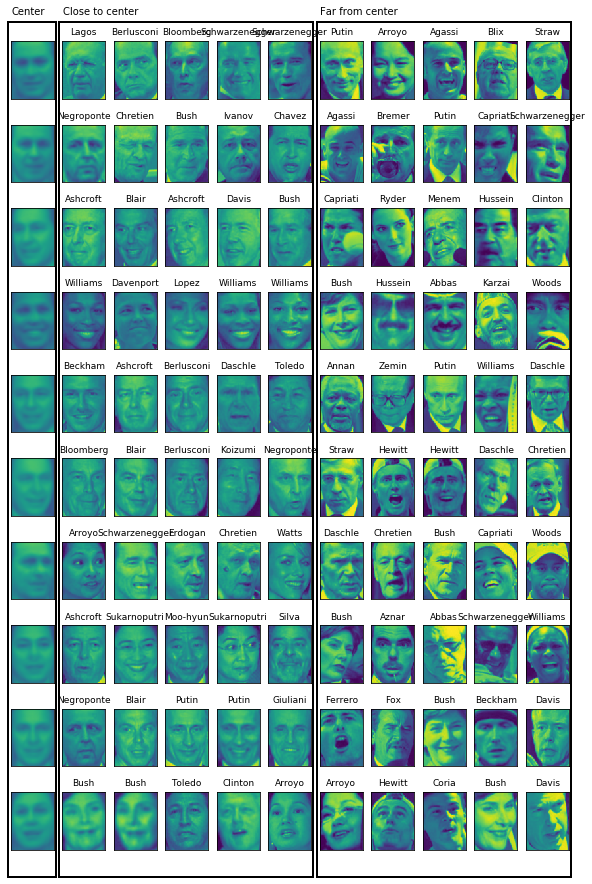

In [35]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [6]:
# agglomerative face data set

agglomerative = AgglomerativeClustering(n_clusters = 10)
labels_agg = agglomerative.fit_predict(X_pca)

print("병합 군집의 클러스터 크기", np.bincount(labels_agg))

병합 군집의 클러스터 크기 [169 660 144 329 217  85  18 261  31 149]


In [9]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


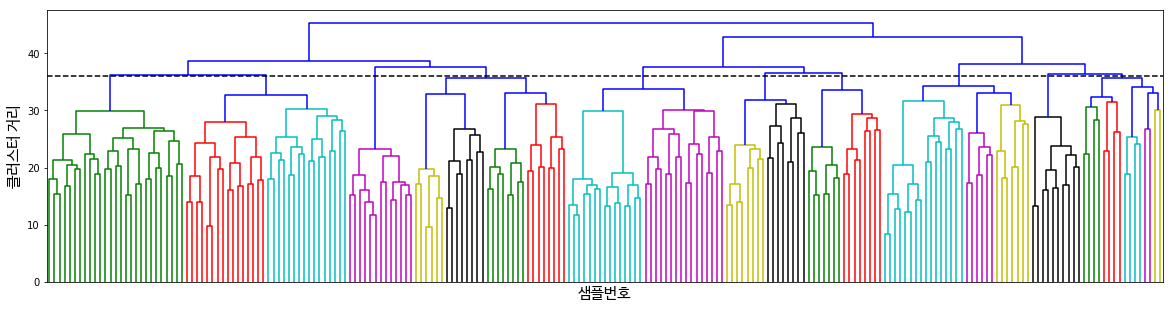

In [26]:
linkage_array = ward(X_pca)
plt.figure(figsize = (20, 5))
dendrogram(linkage_array, p = 7, truncate_mode = "level", no_labels = True)
plt.xlabel("샘플번호", fontproperties = fontprop)
plt.ylabel("클러스터 거리", fontproperties = fontprop)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], "--", c = "k")

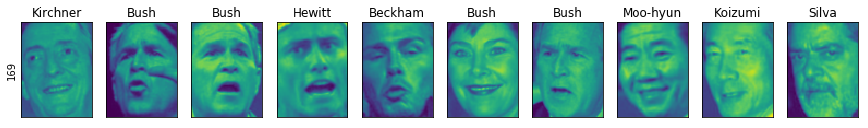

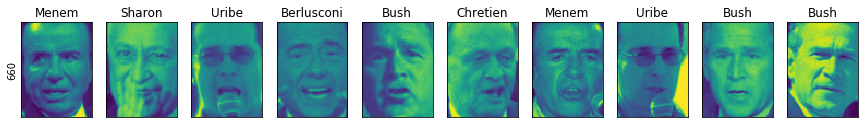

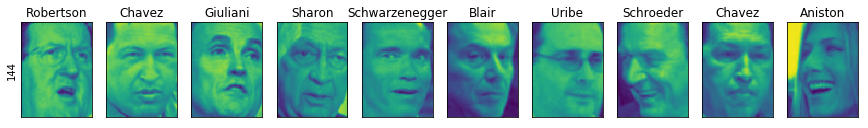

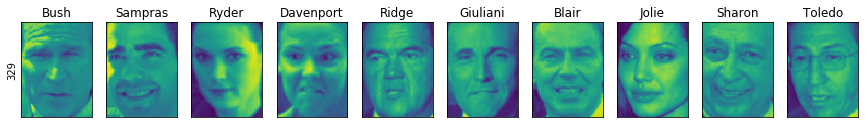

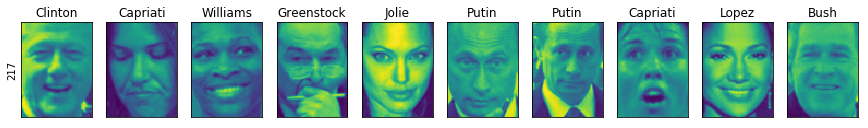

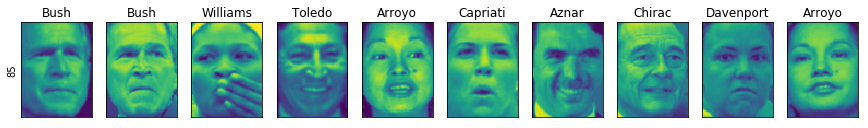

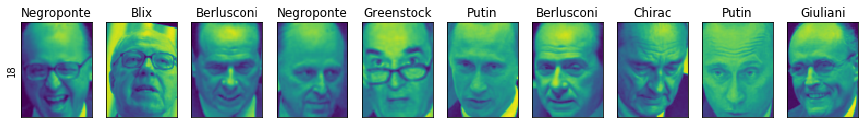

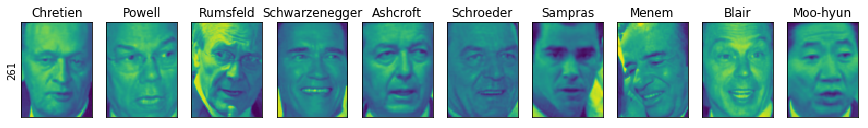

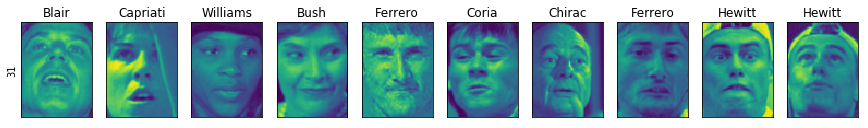

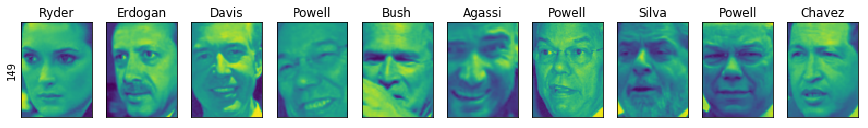

In [30]:
n_cluster = 10
for cluster in range(n_cluster):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw ={"xticks": (), "yticks": ()}, figsize = (15, 8))
    axes[0].set_ylabel(np.sum(mask))
    
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


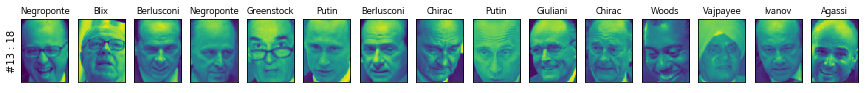

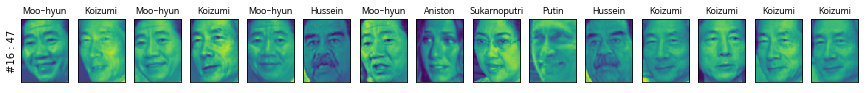

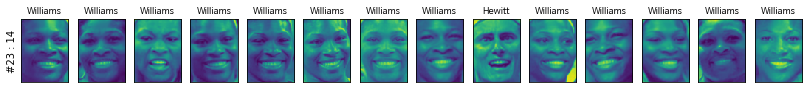

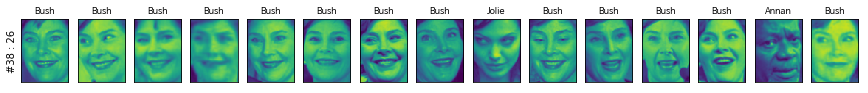

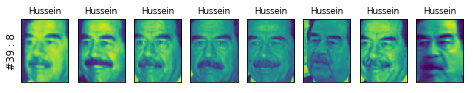

In [40]:
agglomerative = AgglomerativeClustering(n_clusters = 40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw = {"xticks": (), "yticks": ()}, figsize = (15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{} : {}".format(cluster, cluster_size))
    
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1], fontproperties = fontprop_1)
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)